In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data= pd.read_csv("C:\\Users\\HP\\Downloads\\Housing_Price - Housing_Price.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Check missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)

              Missing Values  Percentage
LotFrontage              259   17.739726
Alley                   1369   93.767123
MasVnrType               872   59.726027
MasVnrArea                 8    0.547945
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtFinType2              38    2.602740
Electrical                 1    0.068493
FireplaceQu              690   47.260274
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
PoolQC                  1453   99.520548
Fence                   1179   80.753425
MiscFeature             1406   96.301370


In [5]:
# Drop columns with more than 80% missing values
data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

In [6]:
# Impute numerical missing values
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['GarageYrBlt'].fillna(0, inplace=True)
data['MasVnrArea'].fillna(0, inplace=True)

In [7]:
# Impute categorical missing values
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
data[garage_cols] = data[garage_cols].fillna('None')

bsmt_cat_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
data[bsmt_cat_cols] = data[bsmt_cat_cols].fillna('None')

data['FireplaceQu'].fillna('None', inplace=True)
data['MasVnrType'].fillna('None', inplace=True)

# Impute mode for categorical variables
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

# Verify missing values handled
print("Total missing values left:", data.isnull().sum().sum())

Total missing values left: 0


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


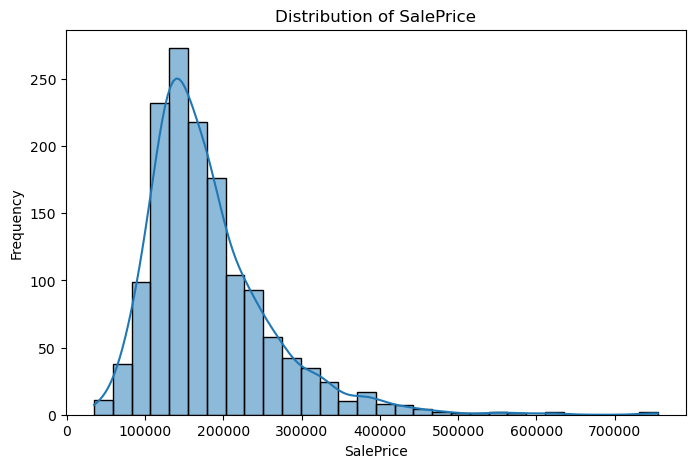

In [8]:
# Plot SalePrice distribution
plt.figure(figsize=(8, 5))
sb.histplot(data['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


In [11]:
# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

print("New dataset shape after encoding:", data.shape)



New dataset shape after encoding: (1460, 248)


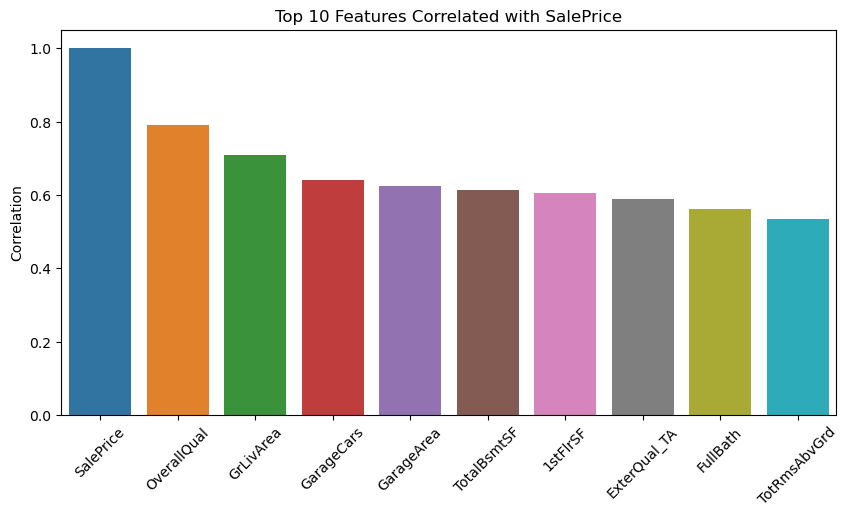

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
ExterQual_TA    0.589044
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


In [12]:
# Check correlation with SalePrice
corr_matrix = data.corr()
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10)

# Plot top correlated features
plt.figure(figsize=(10, 5))
sb.barplot(x=top_corr_features.index, y=top_corr_features.values)
plt.xticks(rotation=45)
plt.title("Top 10 Features Correlated with SalePrice")
plt.ylabel("Correlation")
plt.show()

# Display top correlated features
print(top_corr_features)


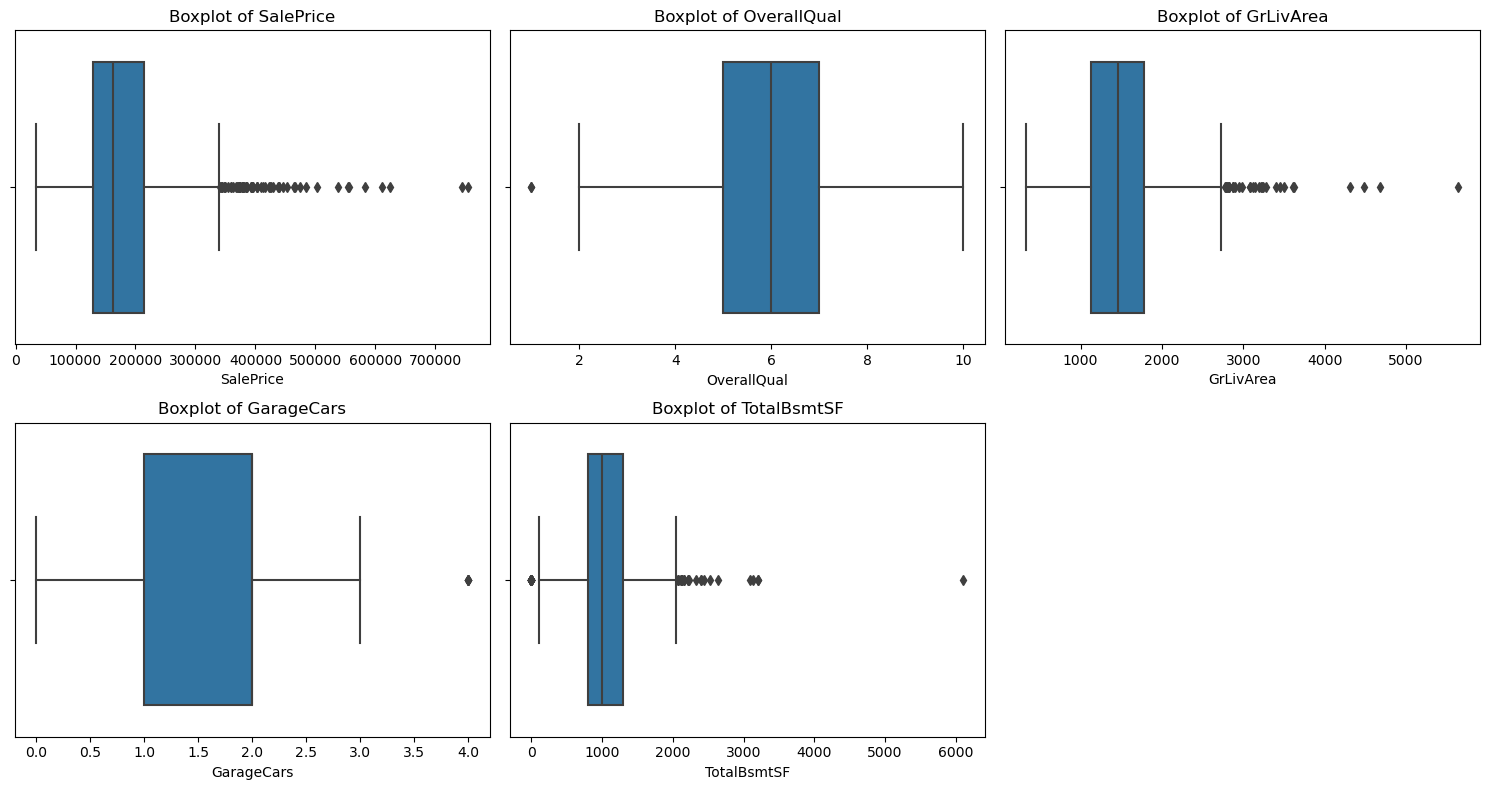

In [31]:
#detecting outliers
# Plot boxplots for highly correlated numerical features
top_numeric_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
plt.figure(figsize=(15, 8))

for i, col in enumerate(top_numeric_features):
    plt.subplot(2, 3, i+1)
    sb.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [32]:
# Remove outliers for SalePrice
data= data[data['SalePrice'] <400000]

print("Dataset shape after outlier removal:", data.shape)


Dataset shape after outlier removal: (1432, 248)
